In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline

In [2]:
df=pd.read_csv('Fever-1.csv')
df.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [3]:
df.isna().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [5]:
df.shape

(36, 4)

In [6]:
df.describe()

A          B  Volunteer     Relief
count  36.000000  36.000000  36.000000  36.000000
mean    2.000000   2.000000   2.500000   7.183333
std     0.828079   0.828079   1.133893   3.272090
min     1.000000   1.000000   1.000000   2.300000
25%     1.000000   1.000000   1.750000   4.675000
50%     2.000000   2.000000   2.500000   6.000000
75%     3.000000   3.000000   3.250000   9.325000
max     3.000000   3.000000   4.000000  13.500000

In [7]:
df.dtypes  ## all the variables are int or float not categorical. 

A              int64
B              int64
Volunteer      int64
Relief       float64
dtype: object

In [8]:
df.A=pd.Categorical(df.A)
df.B=pd.Categorical(df.B)

In [9]:
df.dtypes

A            category
B            category
Volunteer       int64
Relief        float64
dtype: object

### 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

H0 the means of relief with regards to ingredient A is equal. 

muA=muA1=muA2=muA3

H1 the mean of relief with regards to ingredient A is unequal

muA ≠muA1≠muA2≠muA3

H0 the mean of relief with regards to ingredient B is equal

muB=muB1=muB2=muB3

H1 the mean of relief with regards to ingredient B is unequal

muB ≠muB1≠muB2≠muB3




### 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [10]:
formula  = 'Relief ~ A' 
model = ols(formula,df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
A          2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


P value is less than the significance value of 0.05 so we reject the null. Ingredient A is significant for a new compound for relief hay fever. Therefore, we reject the null hypothesis. 

### 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [11]:
formula  = 'Relief ~ B'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
B          2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


P value is less than the significance value of 0.05 so we reject the null. Ingredient B is significant for a new compound for relief hay fever. Therefore, we reject the null hypothesis. 

### 1.4) Analyse the effects of one variable on another with the help of an interaction plot.
What is the interaction between the two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

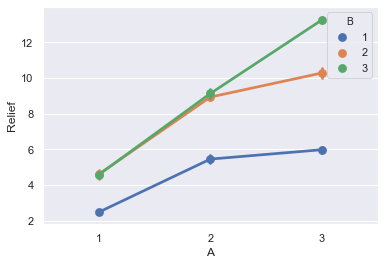

In [12]:
sns.set(style='darkgrid')
sns.pointplot(x='A',y='Relief',data=df,hue='B');

There is an interaction going between the level 2 and level 3 of the ingredients as per the above pointplot. 

<AxesSubplot:xlabel='A', ylabel='Relief'>

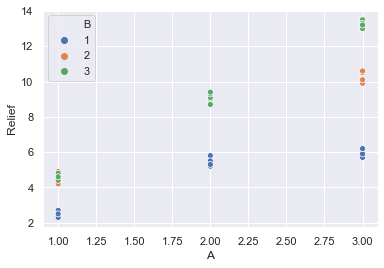

In [13]:
sns.scatterplot(x='A',y='Relief',data=df,hue='B')

In [14]:
formula = 'Relief ~ A + B + A:B' 
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table) 

            df   sum_sq     mean_sq            F        PR(>F)
A          2.0  220.020  110.010000  1827.858462  1.514043e-29
B          2.0  123.660   61.830000  1027.329231  3.348751e-26
A:B        4.0   29.425    7.356250   122.226923  6.972083e-17
Residual  27.0    1.625    0.060185          NaN           NaN


In [15]:
edu=pd.read_csv('Education - Post 12th Standard-1.csv')

In [16]:
edu.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [17]:
edu.shape

(777, 18)

In [18]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [19]:
edu.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

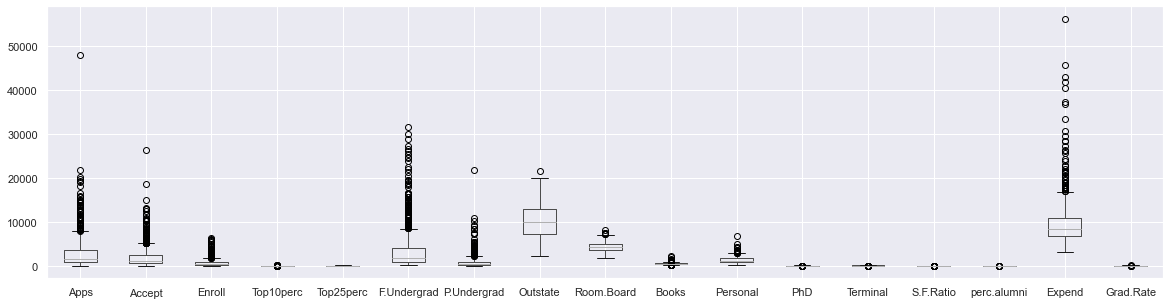

In [20]:
edu.boxplot(figsize=(20,5));

In [21]:
edu.mean()

Apps            3001.638353
Accept          2018.804376
Enroll           779.972973
Top10perc         27.558559
Top25perc         55.796654
F.Undergrad     3699.907336
P.Undergrad      855.298584
Outstate       10440.669241
Room.Board      4357.526384
Books            549.380952
Personal        1340.642214
PhD               72.660232
Terminal          79.702703
S.F.Ratio         14.089704
perc.alumni       22.743887
Expend          9660.171171
Grad.Rate         65.463320
dtype: float64

In [22]:
edu.median()

Apps           1558.0
Accept         1110.0
Enroll          434.0
Top10perc        23.0
Top25perc        54.0
F.Undergrad    1707.0
P.Undergrad     353.0
Outstate       9990.0
Room.Board     4200.0
Books           500.0
Personal       1200.0
PhD              75.0
Terminal         82.0
S.F.Ratio        13.6
perc.alumni      21.0
Expend         8377.0
Grad.Rate        65.0
dtype: float64

In [23]:
edu.quantile(q=0.25)

Apps            776.0
Accept          604.0
Enroll          242.0
Top10perc        15.0
Top25perc        41.0
F.Undergrad     992.0
P.Undergrad      95.0
Outstate       7320.0
Room.Board     3597.0
Books           470.0
Personal        850.0
PhD              62.0
Terminal         71.0
S.F.Ratio        11.5
perc.alumni      13.0
Expend         6751.0
Grad.Rate        53.0
Name: 0.25, dtype: float64

In [24]:
edu.quantile(q=0.50)

Apps           1558.0
Accept         1110.0
Enroll          434.0
Top10perc        23.0
Top25perc        54.0
F.Undergrad    1707.0
P.Undergrad     353.0
Outstate       9990.0
Room.Board     4200.0
Books           500.0
Personal       1200.0
PhD              75.0
Terminal         82.0
S.F.Ratio        13.6
perc.alumni      21.0
Expend         8377.0
Grad.Rate        65.0
Name: 0.5, dtype: float64

In [25]:
edu.quantile(q=0.75)

Apps            3624.0
Accept          2424.0
Enroll           902.0
Top10perc         35.0
Top25perc         69.0
F.Undergrad     4005.0
P.Undergrad      967.0
Outstate       12925.0
Room.Board      5050.0
Books            600.0
Personal        1700.0
PhD               85.0
Terminal          92.0
S.F.Ratio         16.5
perc.alumni       31.0
Expend         10830.0
Grad.Rate         78.0
Name: 0.75, dtype: float64

### 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

(array([ 94., 196., 220., 110.,  67.,  40.,  13.,  17.,  10.,  10.]),
 array([ 1. , 10.5, 20. , 29.5, 39. , 48.5, 58. , 67.5, 77. , 86.5, 96. ]),
 <BarContainer object of 10 artists>)

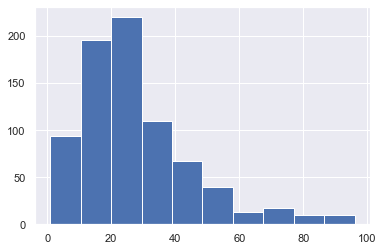

In [26]:
plt.hist(edu['Top10perc'])

<AxesSubplot:xlabel='Top10perc'>

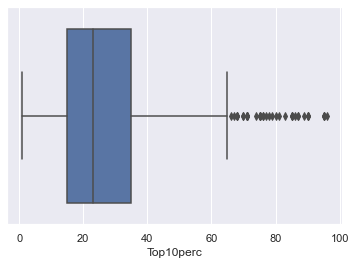

In [27]:
sns.boxplot(edu['Top10perc'])

The data of students with top 10 percentage looks right skewed or positive. maximum data is present in bin 3 class limit 20 to 29.5

(array([  8.,  41.,  97., 106., 140., 126., 102.,  57.,  52.,  48.]),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]),
 <BarContainer object of 10 artists>)

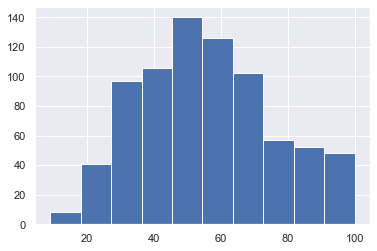

In [28]:
plt.hist(edu['Top25perc'])

<AxesSubplot:xlabel='Top25perc'>

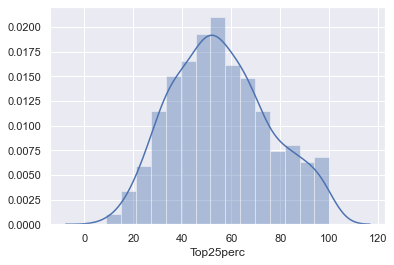

In [29]:
sns.distplot(edu['Top25perc'])

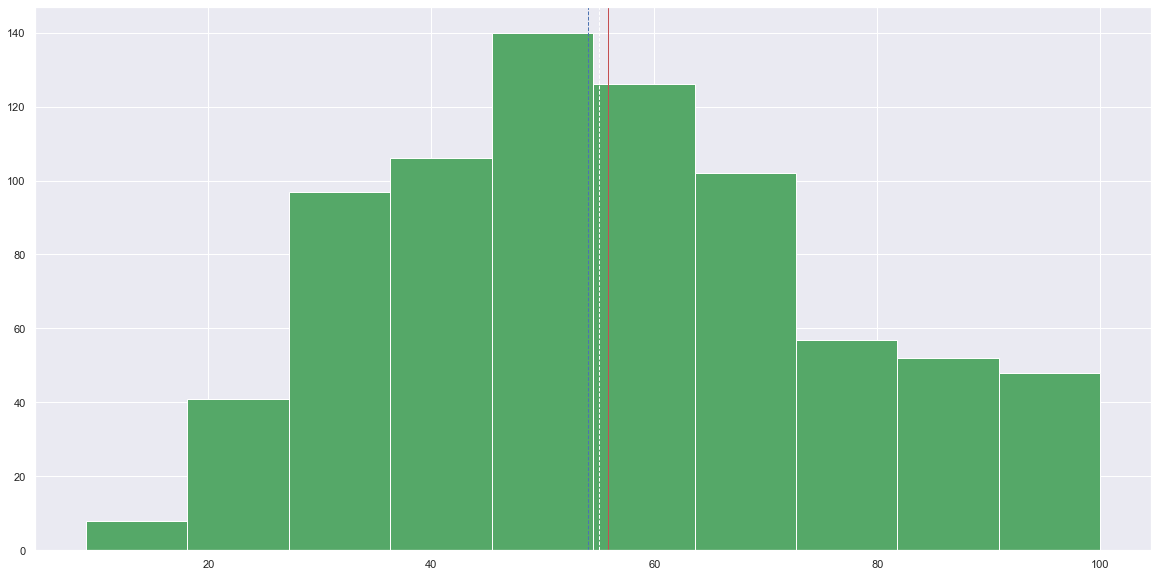

In [30]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(edu.Top25perc, color='g') # plots a simple histogram
plt.axvline(edu.Top25perc.mean(), color='r', linewidth=1)
plt.axvline(edu.Top25perc.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(edu.Top25perc.mode()[0], color='w', linestyle='dashed', linewidth=1)

we can see here students with 25 percent are more in bin 5 with class limit 45.4, 54.5. we can also see that the data looks norminally distributed. we can also see the mean median and mode are close to each one but not at same point. 

(array([  5.,   3.,  14.,  27.,  67., 107., 153., 176., 172.,  53.]),
 array([  8. ,  17.5,  27. ,  36.5,  46. ,  55.5,  65. ,  74.5,  84. ,
         93.5, 103. ]),
 <BarContainer object of 10 artists>)

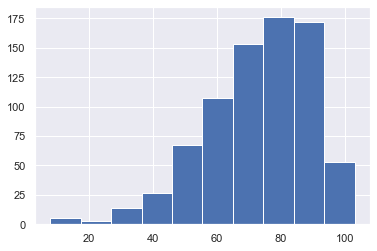

In [31]:
plt.hist(edu['PhD'],bins=10)

We can see here maximim data of PHD are in bin 8 and 9 with class limit (74.5 93.5 ) around 176 and 172 data are present in these two bins.

(array([422., 339.,  13.,   1.,   2.]),
 array([  96. ,  544.8,  993.6, 1442.4, 1891.2, 2340. ]),
 <BarContainer object of 5 artists>)

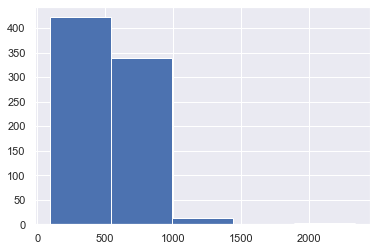

In [32]:
plt.hist(edu['Books'],bins=5)

we can see that students spending on books are around the first bin which with class limit of 96 to 544.8.we can see that the two bars represent the maximum data.And the 2nd bin from class limit 544.8 to 993.6 has the next largest data.

<AxesSubplot:xlabel='Books'>

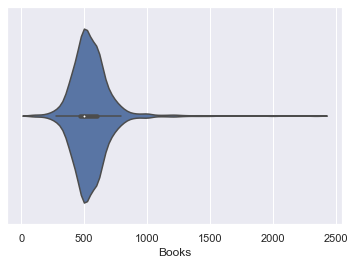

In [33]:
sns.violinplot(edu.Books)

we can see the violen plot of the books variable above and as per the image we can see maximum data are in 500 range.

<AxesSubplot:xlabel='Outstate'>

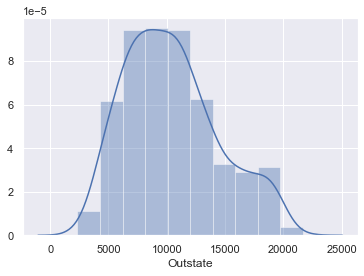

In [34]:
sns.distplot(edu.Outstate,bins=10)

(array([ 17.,  93., 142., 143., 142.,  94.,  49.,  44.,  47.,   6.]),
 array([ 2340.,  4276.,  6212.,  8148., 10084., 12020., 13956., 15892.,
        17828., 19764., 21700.]),
 <BarContainer object of 10 artists>)

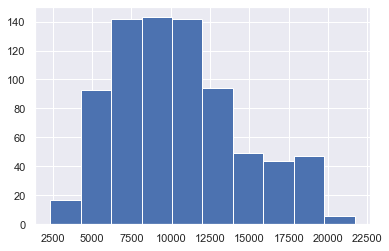

In [35]:
plt.hist(edu['Outstate'],bins=10)

We can see a huge number of students are from coming to study from outstate also. we can see bins 3 4 and 5 have almost same amount of data.The class limit of bins 3 4 and 5 are 6212,8148,10084 and have data of 142,143, and 142 respectively.  We can also see from the dist plot that the data is not normally distributed. 

(array([229., 316., 160.,  48.,  17.,   3.,   2.,   1.,   0.,   1.]),
 array([ 250.,  905., 1560., 2215., 2870., 3525., 4180., 4835., 5490.,
        6145., 6800.]),
 <BarContainer object of 10 artists>)

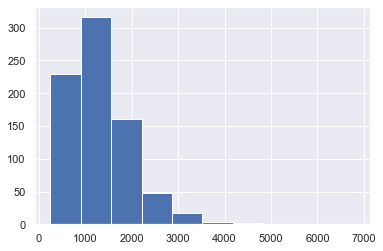

In [36]:
plt.hist(edu['Personal'],bins=10)

We can see here that 2 bin has the maximum number of students who spend on personal needs. There are around 300 students who spend between 905 and 1560. From above we can also see the mean of personal is around the same range of 1340. 

(array([  4.,  15.,  46., 133., 152., 188., 142.,  71.,  25.,   1.]),
 array([ 10. ,  20.8,  31.6,  42.4,  53.2,  64. ,  74.8,  85.6,  96.4,
        107.2, 118. ]),
 <BarContainer object of 10 artists>)

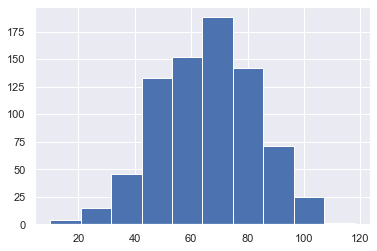

In [37]:
plt.hist(edu['Grad.Rate'],bins=10)

(array([ 17.,  64., 312., 236., 111.,  31.,   4.,   1.,   0.,   1.]),
 array([ 2.5 ,  6.23,  9.96, 13.69, 17.42, 21.15, 24.88, 28.61, 32.34,
        36.07, 39.8 ]),
 <BarContainer object of 10 artists>)

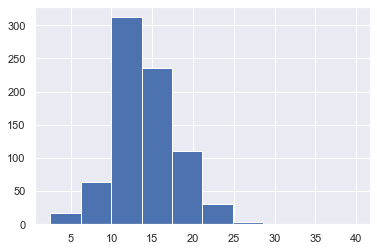

In [38]:
plt.hist(edu['S.F.Ratio'],bins=10)

<AxesSubplot:xlabel='Grad.Rate'>

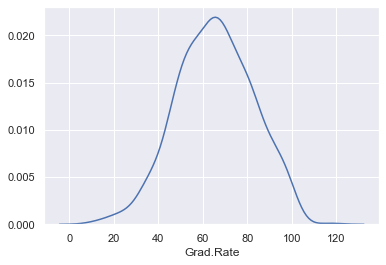

In [39]:
sns.distplot(edu['Grad.Rate'],bins=10,hist=False)

<AxesSubplot:xlabel='Grad.Rate'>

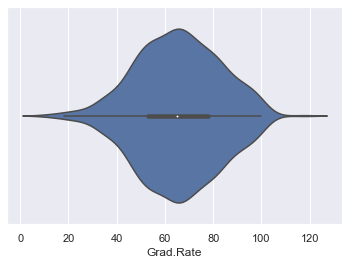

In [40]:
sns.violinplot(edu['Grad.Rate'])

As per the above violen plot we can see most of our graduation rate of students are around 60 to 80. The mean for Grad rate is around 65. This means that 

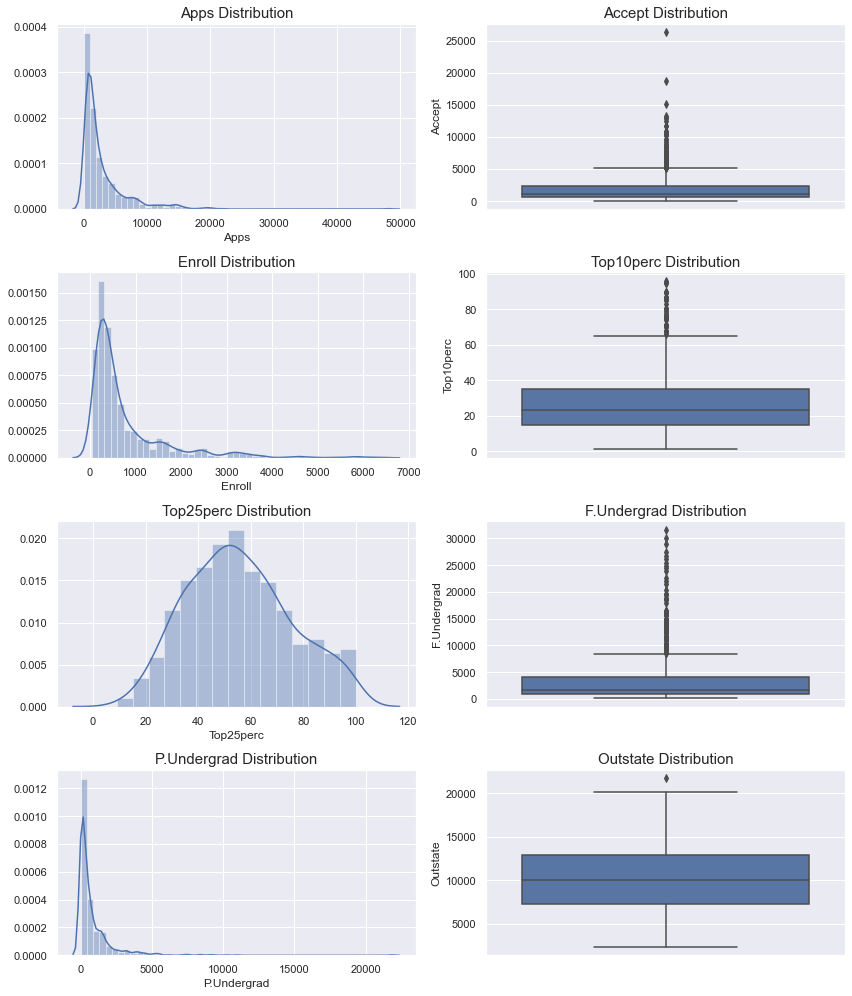

In [41]:
## Univariate except Name column
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(edu['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=15)
a = sns.boxplot(edu['Accept'] , orient = "v" , ax=axes[0][1])
a.set_title("Accept Distribution",fontsize=15)

a = sns.distplot(edu['Enroll'] , ax=axes[1][0])
a.set_title("Enroll Distribution",fontsize=15)

a = sns.boxplot(edu['Top10perc'] , orient = "v" , ax=axes[1][1])
a.set_title("Top10perc Distribution",fontsize=15)

a = sns.distplot(edu['Top25perc'] , ax=axes[2][0])
a.set_title("Top25perc Distribution",fontsize=15)

a = sns.boxplot(edu['F.Undergrad'] , orient = "v" , ax=axes[2][1])
a.set_title("F.Undergrad Distribution",fontsize=15)


a = sns.distplot(edu['P.Undergrad'] , ax=axes[3][0])
a.set_title("P.Undergrad Distribution",fontsize=15)

a = sns.boxplot(edu['Outstate'] , orient = "v" , ax=axes[3][1])
a.set_title("Outstate Distribution",fontsize=15)

plt.tight_layout()
plt.show()

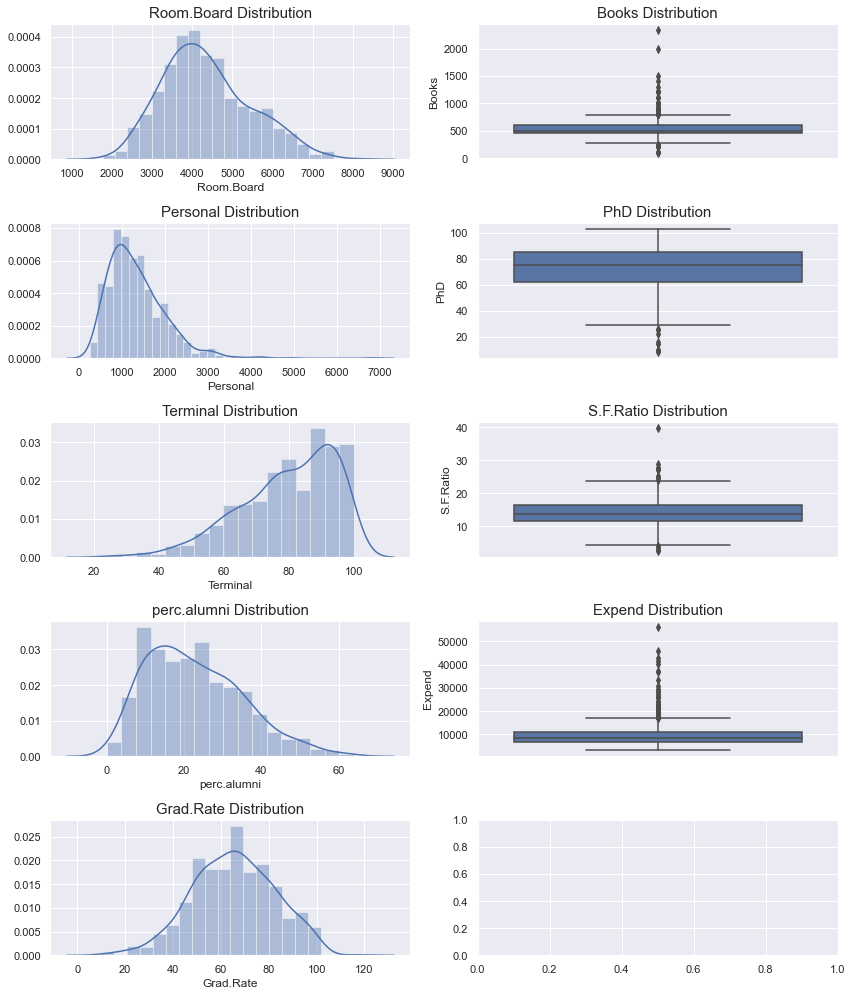

In [42]:
## Univariate except Name column
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(edu['Room.Board'] , ax=axes[0][0])
a.set_title("Room.Board Distribution",fontsize=15)

a = sns.boxplot(edu['Books'] , orient = "v" , ax=axes[0][1])
a.set_title("Books Distribution",fontsize=15)

a = sns.distplot(edu['Personal'] , ax=axes[1][0])
a.set_title("Personal Distribution",fontsize=15)

a = sns.boxplot(edu['PhD'] , orient = "v" , ax=axes[1][1])
a.set_title("PhD Distribution",fontsize=15)

a = sns.distplot(edu['Terminal'] , ax=axes[2][0])
a.set_title("Terminal Distribution",fontsize=15)

a = sns.boxplot(edu['S.F.Ratio'] , orient = "v" , ax=axes[2][1])
a.set_title("S.F.Ratio Distribution",fontsize=15)


a = sns.distplot(edu['perc.alumni'] , ax=axes[3][0])
a.set_title("perc.alumni Distribution",fontsize=15)

a = sns.boxplot(edu['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("Expend Distribution",fontsize=15)

a = sns.distplot(edu['Grad.Rate'], ax=axes[4][0])
a.set_title("Grad.Rate Distribution",fontsize=15)

plt.tight_layout()
plt.show()

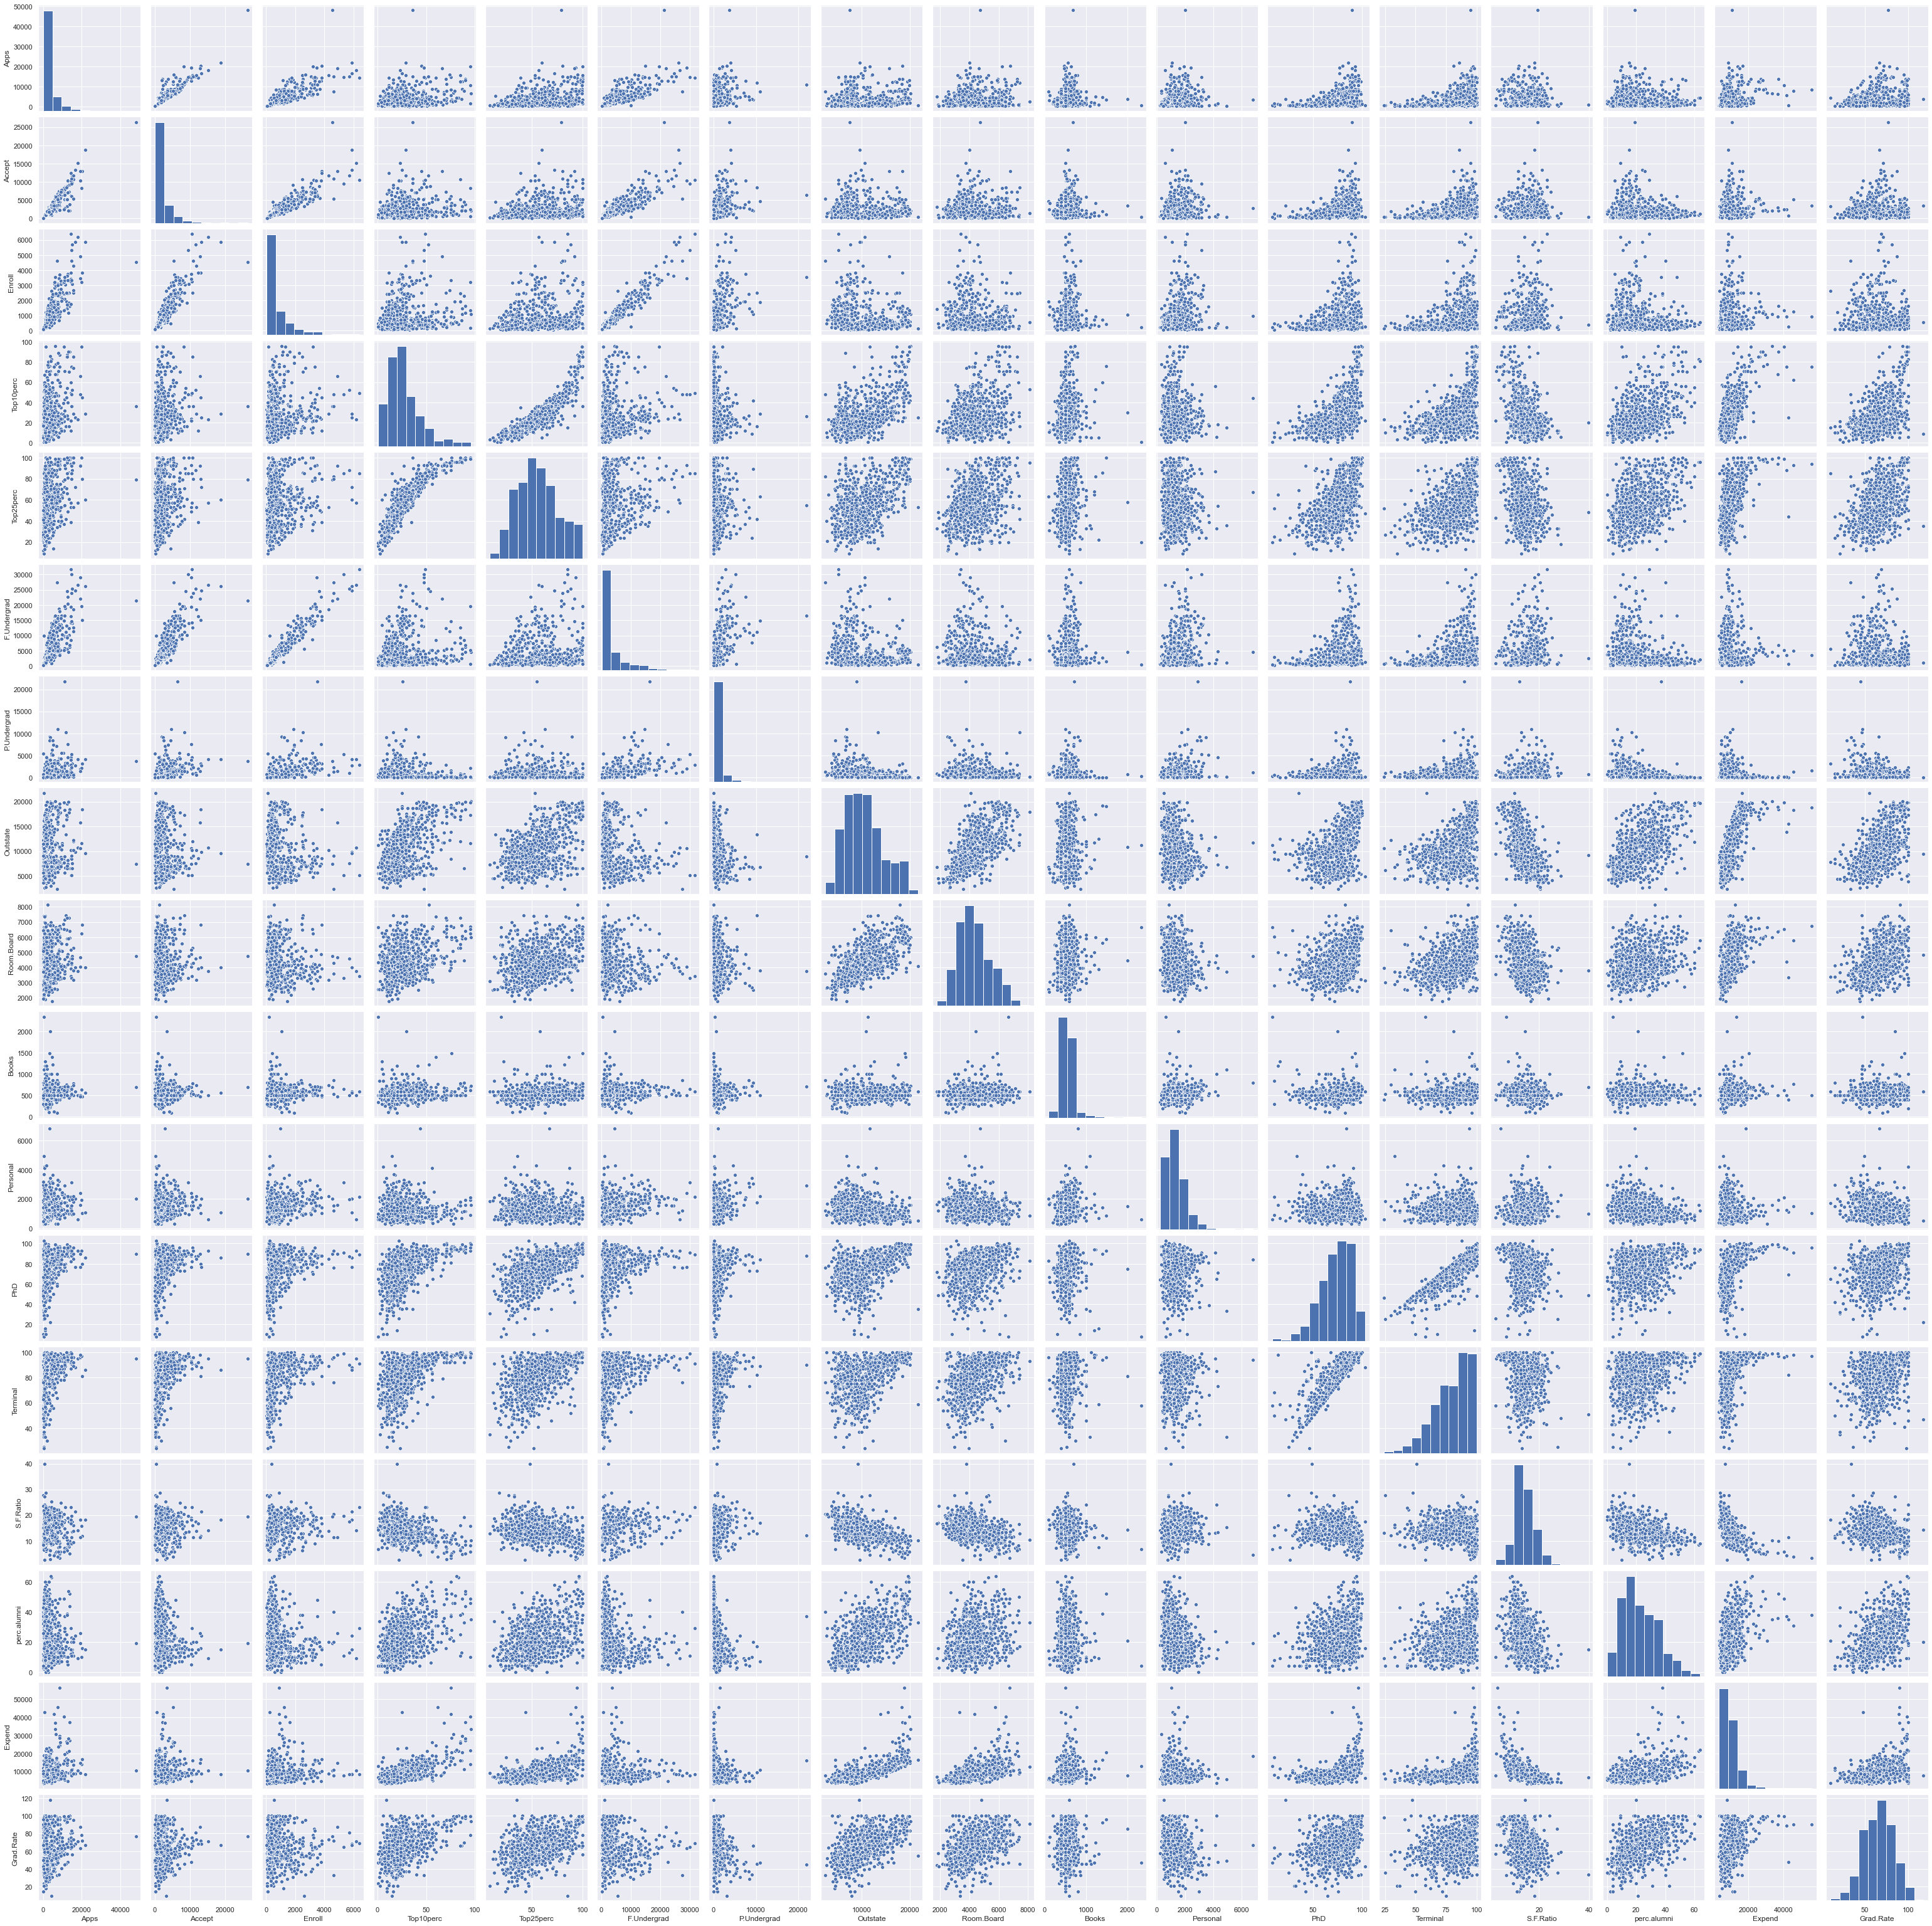

In [43]:
sns.pairplot(edu)


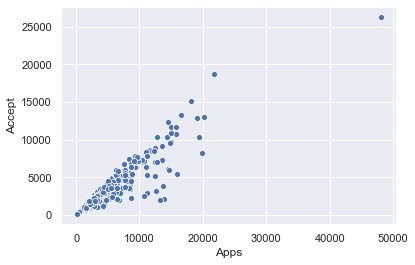

In [44]:
sns.scatterplot(edu['Apps'],edu['Accept']);

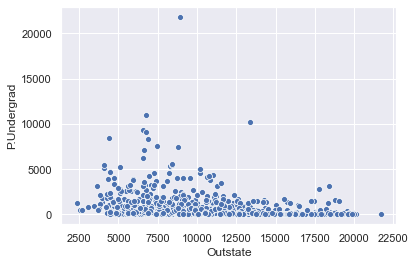

In [45]:
sns.scatterplot(edu['Outstate'],edu['P.Undergrad']);

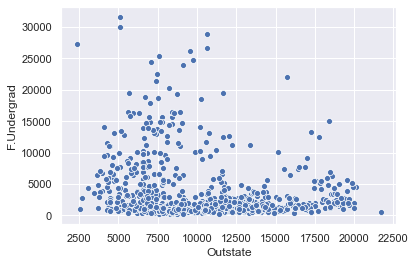

In [46]:
sns.scatterplot(edu['Outstate'],edu['F.Undergrad']);

In [47]:
edu.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

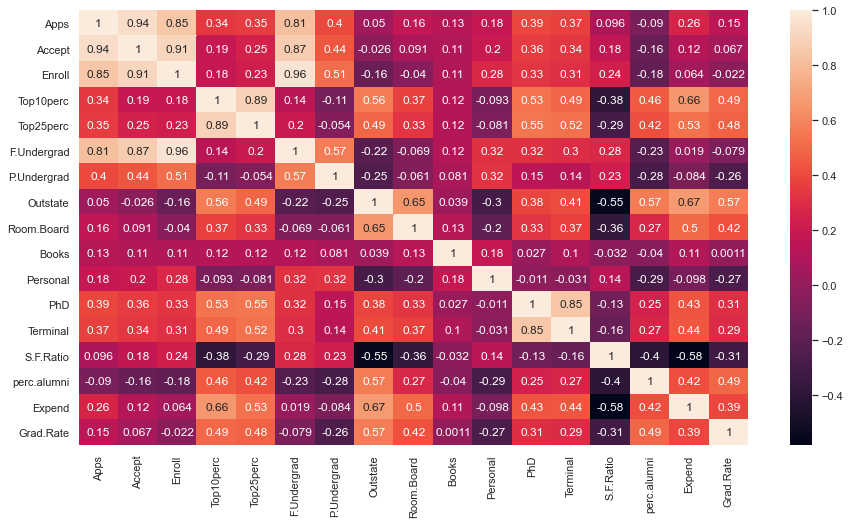

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(edu.corr(),annot=True);

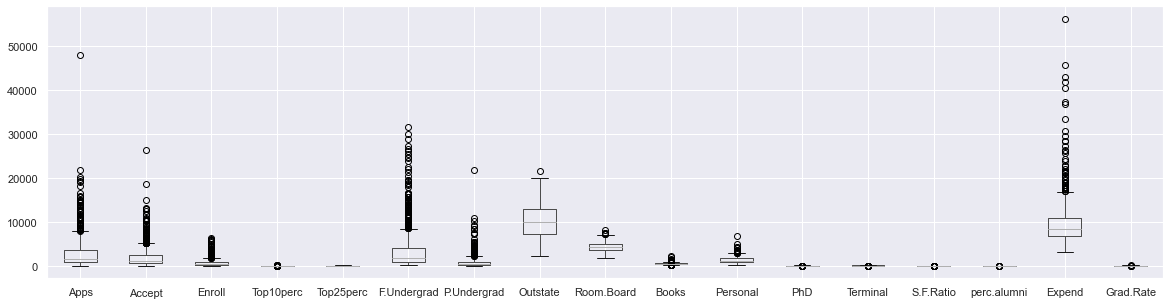

In [49]:
edu.boxplot(figsize=(20,5));

In [50]:
edu.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [51]:
dups = edu.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

edu[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

In [82]:
data_new=edu

In [83]:
data_new.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [84]:
data_new=data_new.drop(['Names'],axis=1)


In [85]:
data_new.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [91]:
from scipy.stats import zscore
data_new = data_new.apply(zscore)
data_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

<AxesSubplot:>

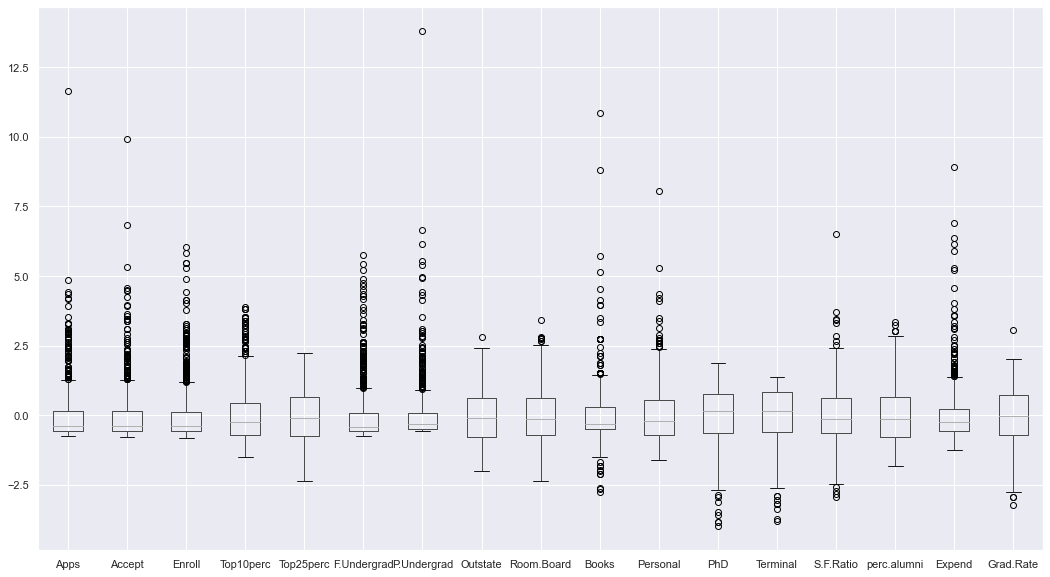

In [132]:
data_new.boxplot(figsize=(18,10))


In [58]:
data_new.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

In [59]:
data_new.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

<AxesSubplot:>

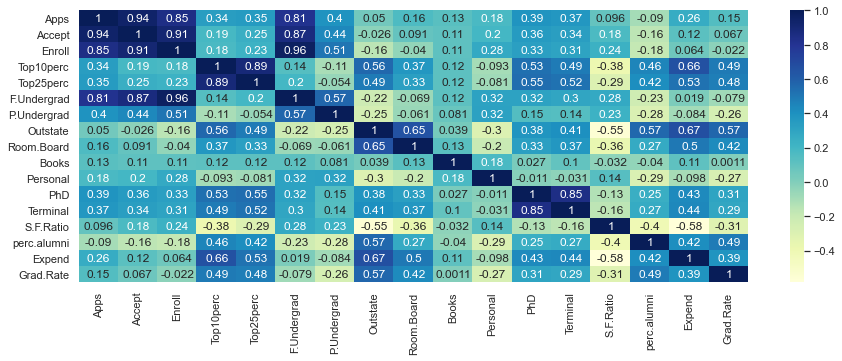

In [60]:
plt.figure(figsize=(15,5))
sns.heatmap(data_new.corr(),annot=True,cmap='YlGnBu')

In [61]:
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [62]:
a = pd.DataFrame(cov_matrix)
a.head(10)

0         1         2         3         4         5         6  \
0  1.001289  0.944666  0.847913  0.339270  0.352093  0.815540  0.398777   
1  0.944666  1.001289  0.912811  0.192695  0.247795  0.875350  0.441839   
2  0.847913  0.912811  1.001289  0.181527  0.227037  0.965883  0.513730   
3  0.339270  0.192695  0.181527  1.001289  0.893144  0.141471 -0.105492   
4  0.352093  0.247795  0.227037  0.893144  1.001289  0.199702 -0.053646   
5  0.815540  0.875350  0.965883  0.141471  0.199702  1.001289  0.571247   
6  0.398777  0.441839  0.513730 -0.105492 -0.053646  0.571247  1.001289   
7  0.050224 -0.025788 -0.155678  0.563055  0.490024 -0.216020 -0.253839   
8  0.165152  0.091016 -0.040284  0.371959  0.331917 -0.068979 -0.061405   
9  0.132729  0.113672  0.112856  0.119012  0.115676  0.115699  0.081304   

          7         8         9        10        11        12        13  \
0  0.050224  0.165152  0.132729  0.178961  0.391201  0.369968  0.095756   
1 -0.025788  0.091016  0.113672  0.201248  0.356216  0.338018  0.176456   
2 -0.155678 -0.040284  0.112856  0.281291  0.331896  0.308671  0.237577   
3  0.563055  0.371959  0.119012 -0.093437  0.532513  0.491768 -0.385370   
4  0.490024  0.331917  0.115676 -0.080914  0.546566  0.525425 -0.295009   
5 -0.216020 -0.068979  0.115699  0.317608  0.318747  0.300406  0.280064   
6 -0.253839 -0.061405  0.081304  0.320294  0.149306  0.142086  0.232830   
7  1.001289  0.655100  0.038905 -0.299472  0.383476  0.408509 -0.555536   
8  0.655100  1.001289  0.128128 -0.199685  0.329627  0.375022 -0.363095   
9  0.038905  0.128128  1.001289  0.179526  0.026940  0.100084 -0.031970   

         14        15        16  
0 -0.090342  0.259927  0.146944  
1 -0.160196  0.124878  0.067399  
2 -0.181027  0.064252 -0.022370  
3  0.456072  0.661765  0.495627  
4  0.418403  0.528127  0.477896  
5 -0.229758  0.018676 -0.078875  
6 -0.281154 -0.083676 -0.257332  
7  0.566992  0.673646  0.572026  
8  0.272714  0.502386  0.425489  
9 -0.040260  0.112554  0.001062

In [64]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]


Eigen Vectors 
 %s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6

eigen vector is the contribution of each variable making towards each Principal component.Each PCA will have the data of all the variables. For eg 1st eigen vector will have contribution of each 17 variables towards the first principal component. thats why we see 17 values in each vector and there are total 17 vectors for each principal component. 

In [99]:
eigen_values = pd.DataFrame(eig_vals)
eigen_values

0
0   5.450522
1   4.483607
2   1.174668
3   1.008206
4   0.934231
5   0.848491
6   0.605788
7   0.587872
8   0.530613
9   0.404303
10  0.023028
11  0.036725
12  0.313446
13  0.088025
14  0.143978
15  0.167794
16  0.220611

In [100]:
eigen_vectors = pd.DataFrame(eig_vecs)
eigen_vectors.head(17)

0         1         2         3         4         5         6  \
0  -0.248766  0.331598  0.063092 -0.281311  0.005741  0.016237  0.042486   
1  -0.207602  0.372117  0.101249 -0.267817  0.055786 -0.007535  0.012950   
2  -0.176304  0.403724  0.082986 -0.161827 -0.055694  0.042558  0.027693   
3  -0.354274 -0.082412 -0.035056  0.051547 -0.395434  0.052693  0.161332   
4  -0.344001 -0.044779  0.024148  0.109767 -0.426534 -0.033092  0.118486   
5  -0.154641  0.417674  0.061393 -0.100412 -0.043454  0.043454  0.025076   
6  -0.026443  0.315088 -0.139682  0.158558  0.302385  0.191199 -0.061042   
7  -0.294736 -0.249644 -0.046599 -0.131291  0.222532  0.030000 -0.108529   
8  -0.249030 -0.137809 -0.148967 -0.184996  0.560919 -0.162755 -0.209744   
9  -0.064758  0.056342 -0.677412 -0.087089 -0.127289 -0.641055  0.149692   
10  0.042529  0.219929 -0.499721  0.230711 -0.222311  0.331398 -0.633790   
11 -0.318313  0.058311  0.127028  0.534725  0.140166 -0.091256  0.001096   
12 -0.317056  0.046429  0.066038  0.519443  0.204720 -0.154928  0.028477   
13  0.176958  0.246665  0.289848  0.161189 -0.079388 -0.487046 -0.219259   
14 -0.205082 -0.246595  0.146989 -0.017314 -0.216297  0.047340 -0.243321   
15 -0.318909 -0.131690 -0.226744 -0.079273  0.075958  0.298119  0.226584   
16 -0.252316 -0.169241  0.208065 -0.269129 -0.109268 -0.216163 -0.559944   

           7         8         9        10        11        12        13  \
0   0.103090  0.090227 -0.052510  0.358970 -0.459139  0.043046 -0.133406   
1   0.056271  0.177865 -0.041140 -0.543427  0.518569 -0.058406  0.145498   
2  -0.058662  0.128561 -0.034488  0.609651  0.404318 -0.069399 -0.029590   
3   0.122678 -0.341100 -0.064026 -0.144986  0.148739 -0.008105 -0.697723   
4   0.102492 -0.403712 -0.014549  0.080348 -0.051868 -0.273128  0.617275   
5  -0.078890  0.059442 -0.020847 -0.414705 -0.560363 -0.081158 -0.009916   
6  -0.570784 -0.560673  0.223106  0.009018  0.052731  0.100693 -0.020952   
7  -0.009846  0.004573 -0.186675  0.050900 -0.101595  0.143221 -0.038354   
8   0.221453 -0.275023 -0.298324  0.001146  0.025929 -0.359322 -0.003402   
9  -0.213293  0.133663  0.082029  0.000773 -0.002883  0.031940  0.009439   
10  0.232661  0.094469 -0.136028 -0.001114  0.012890 -0.018578  0.003090   
11  0.077040  0.185182  0.123452  0.013813 -0.029808  0.040372  0.112056   
12  0.012161  0.254938  0.088578  0.006209  0.027076 -0.058973 -0.158910   
13  0.083605 -0.274544 -0.472045 -0.002222  0.021248  0.445001  0.020899   
14 -0.678524  0.255335 -0.423000 -0.019187 -0.003334 -0.130728  0.008418   
15  0.054159  0.049139 -0.132286 -0.035310  0.043880  0.692089  0.227742   
16  0.005336 -0.041904  0.590271 -0.013071  0.005008  0.219839  0.003394   

          14        15        16  
0   0.080633 -0.595831  0.024071  
1   0.033467 -0.292642 -0.145102  
2  -0.085697  0.444638  0.011143  
3  -0.107828 -0.001023  0.038554  
4   0.151742 -0.021884 -0.089352  
5  -0.056373  0.523622  0.056177  
6   0.019286 -0.125998 -0.063536  
7  -0.034012  0.141856 -0.823444  
8  -0.058429  0.069749  0.354560  
9  -0.066849 -0.011438 -0.028159  
10  0.027529 -0.039455 -0.039264  
11 -0.691126 -0.127696  0.023222  
12  0.671009  0.058313  0.016485  
13  0.041374  0.017715 -0.011026  
14 -0.027154 -0.104088  0.182661  
15  0.073123  0.093746  0.325982  
16  0.036477  0.069197  0.122107

In [ ]:
data_new.columns

## explicit form
## we can see from the explicit data that top 10 perc has the highest value to the contribution to PC1 which is at 0.35 followed by top 25 perc 0.34
PC1 = (Apps*0.248766)+(Accept*0.207602)+(Enroll*0.176304)+(Top10perc*0.354274)+(Top25perc*0.344001)+(F.Undergrad*0.154641)+
(P.Undergrad*0.026443)+(Outstate*0.294736)+(Room.Board*0.249030)+(Books*0.064758)+(Personal*0.042529)+(PhD*0.318313)+(Terminal*0.317056)
(S.F.Ratio*0.176958)+(perc.alumni*0.205082)+(Expend*0.318909)+(Grad.Rate*0.252316)

In [142]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


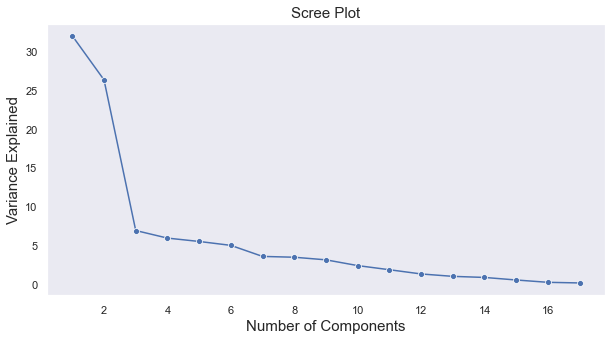

In [143]:
plt.figure(figsize=(10,5))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

We can see a elbow formation at 3rd principal component,after this point the curve keep falling.

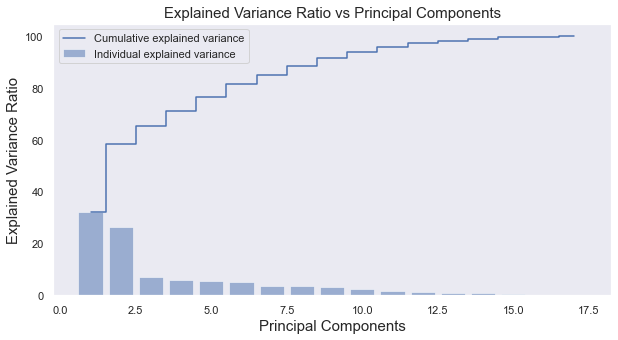

In [103]:
plt.figure(figsize=(10 ,5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932736e+00, -4.69508068e-01],
       [ 7.67333515e-01, -5.78830075e-01, -1.09281887e+00, ...,
        -7.72352802e-02, -2.06832905e+00,  3.66661004e-01],
       [-1.01074039e-01,  2.27880717e+00, -4.38095304e-01, ...,
        -4.01707588e-04,  2.07358252e+00, -1.32892110e+00],
       [-9.21748662e-01,  3.58890612e+00,  6.77243886e-01, ...,
         5.43111365e-02,  8.52028712e-01, -1.08014550e-01]])

In [134]:
data_reduced.shape

(777, 4)

In [135]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241183, -0.04477865,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309181, -0.10124972, -0.08298527,  0.03505833, -0.02415045,
        -0.06139277,  0.13968176,  0.04659902,  0.14896747,  0.67741165,
         0.49972107, -0.12702849, -0.06603725, -0.2898485 , -0.14698932,
         0.22674311, -0.20806464],
       [ 0.28131007,  0.26781839,  0.16182631, -0.05155159, -0.10976263,
         0.100412  , -0.15855856,  0.13129114,  0.18499587,  0.08708922,
        -0.23071049, -0.53472465, -0.51944348, -0.16118933,  0.0173143 ,
         0.07927485

In [136]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989])

In [137]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([32. , 58.3, 65.2, 71.1])

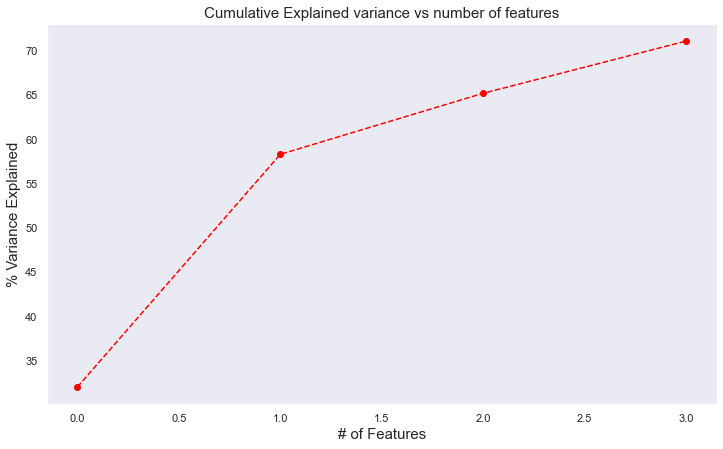

In [138]:
plt.figure(figsize=(12,7))
plt.plot(var, marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative Explained variance vs number of features',fontsize=15)
plt.grid()
plt.show()

In [139]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101250 -0.082985   0.035058  -0.024150    -0.061393   
3  0.281310  0.267818  0.161826  -0.051552  -0.109763     0.100412   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066037   
3    -0.158559  0.131291    0.184996  0.087089 -0.230710 -0.534725 -0.519443   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289849    -0.146989  0.226743  -0.208065  
3  -0.161189     0.017314  0.079275   0.269129

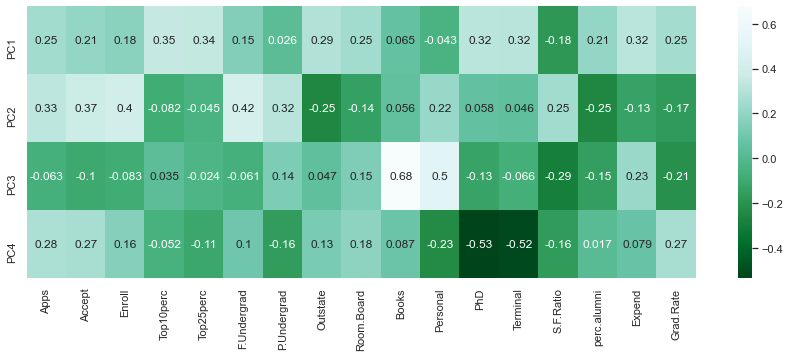

In [141]:
plt.figure(figsize=(15,5))
sns.heatmap(df_comp,annot=True,yticklabels=['PC1','PC2','PC3','PC4'],cmap='BuGn_r')
plt.show()

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline

In [55]:
df=pd.read_csv('C:/Users/shara/OneDrive/Great Lakes/Mc Donalds competition/Mc_donald.csv') 

In [56]:
df.head()

Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0                             25        0.0  ...             31   
1                             15        0.0  ...             30   
2                             42        0.0  ...             29   
3                             52        0.0  ...             30   
4                             42        0.0  ...             30   

   Carbohydrates (% Daily Value)  Dietary Fiber  \
0                             10              4   
1                             10              4   
2                             10              4   
3                             10              4   
4                             10              4   

   Dietary Fiber (% Daily Value)  Sugars  Protein  Vitamin A (% Daily Value)  \
0                             17       3       17                         10   
1                             17       3       18                          6   
2                             17       2       14                          8   
3                             17       2       21                         15   
4                             17       2       21                          6   

   Vitamin C (% Daily Value)  Calcium (% Daily Value)  Iron (% Daily Value)  
0                          0                       25                    15  
1                          0                       25                     8  
2                          0                       25                    10  
3                          0                       30                    15  
4                          0                       25                    10  

[5 rows x 24 columns]

In [64]:
df1=pd.read_csv('C:/Users/shara/OneDrive/Great Lakes/Statistics/Cardio fitness python/CardioGoodFitness.csv')